In [281]:
import numpy as np 

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [287]:
from sklearn import datasets
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy
X, y =  datasets.make_blobs(n_samples=50, centers=2, center_box=[-7.5, 7.5], random_state=40)



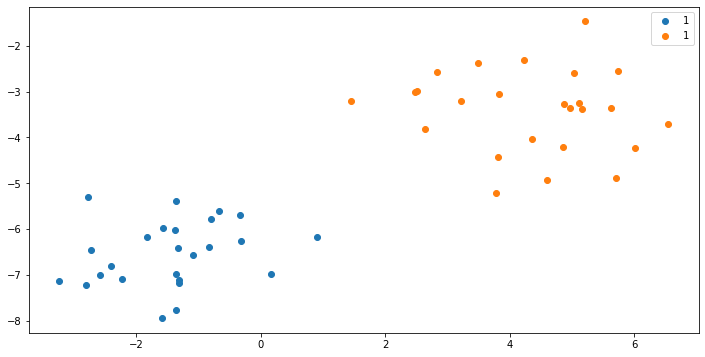

In [288]:
# plot results
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,1, figsize=(12,6))

n_classes = 2

for i in range(n_classes):
    index = np.where(y == i)
    plt.scatter(X[index, 0], X[index, 1], label=y[i])

plt.legend()
plt.show()

In [298]:
clf = SVM()
clf.fit(X, y)
print(clf.w, clf.b)
y_pred = clf.predict(X)
acc = accuracy(y, y_pred)
print("Training Accuracy: ",acc)

[0.84762575 0.36484804] -0.47400000000000037
Training Accuracy:  0.5


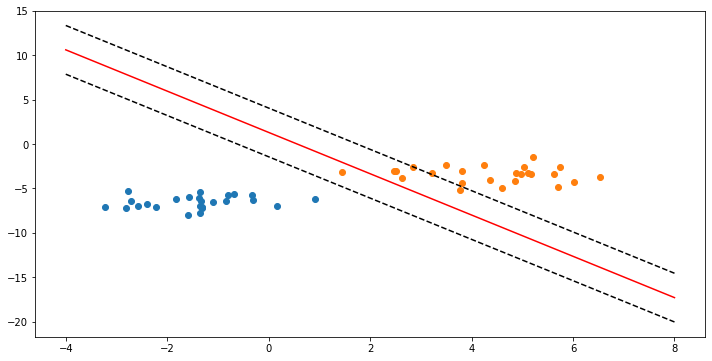

In [302]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

n_classes = 2

for i in range(n_classes):
    index = np.where(y == i)
    plt.scatter(X[index, 0], X[index, 1], label=y[i])


# Constructing a hyperplane using a formula.
w = clf.w          # w consists of 2 elements
b = clf.b      # b consists of 1 element
x_points = np.linspace(-4, 8)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
a = -w[0] / w[1]

# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_down = y_points - np.sqrt(1 + a ** 2) * margin
yy_up = y_points + np.sqrt(1 + a ** 2) * margin

plt.plot(x_points, yy_down, "k--")
plt.plot(x_points, yy_up, "k--");

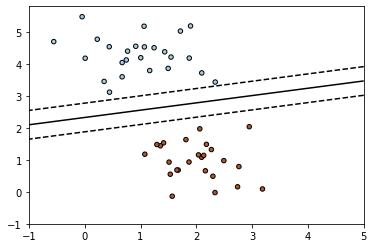

In [279]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=1000)

clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ["dashed", "solid", "dashed"]
colors = "k"
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor="black", s=20)

plt.axis("tight")
plt.show()